In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

In [2]:
dataset  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bike_data/bike_train.csv" )

In [3]:
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,10136,03-03-2012,1,1,3,9,0,6,0,3,0.38,0.3939,0.87,0.0896,94
1,6987,23-10-2011,4,0,10,17,0,0,0,1,0.50,0.4848,0.63,0.1343,340
2,14303,24-08-2012,3,1,8,3,0,5,1,1,0.64,0.6061,0.73,0.0000,8
3,2295,10-04-2011,2,0,4,11,0,0,0,2,0.40,0.4091,0.87,0.1343,202
4,7869,29-11-2011,4,0,11,12,0,2,1,3,0.42,0.4242,0.82,0.4179,18


In [4]:
dataset.shape

(13903, 15)

In [5]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000,13903.000000
mean,8716.116809,2.507660,0.504855,6.546788,11.550313,0.029634,3.000360,0.680573,1.425376,0.496537,0.475354,0.626633,0.189935,189.526433
std,5028.742843,1.109166,0.499994,3.447943,6.909805,0.169581,2.009132,0.466272,0.640678,0.192830,0.172028,0.192620,0.122033,181.112169
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,4370.500000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,8732.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,143.000000
75%,13075.500000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.980000,1.000000,1.000000,0.850700,976.000000


In [6]:
dataset.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [7]:
dataset.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [8]:
dataset['dteday'] =pd.to_datetime(dataset.dteday)

In [9]:
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,10136,2012-03-03,1,1,3,9,0,6,0,3,0.38,0.3939,0.87,0.0896,94
1,6987,2011-10-23,4,0,10,17,0,0,0,1,0.50,0.4848,0.63,0.1343,340
2,14303,2012-08-24,3,1,8,3,0,5,1,1,0.64,0.6061,0.73,0.0000,8
3,2295,2011-10-04,2,0,4,11,0,0,0,2,0.40,0.4091,0.87,0.1343,202
4,7869,2011-11-29,4,0,11,12,0,2,1,3,0.42,0.4242,0.82,0.4179,18


In [ ]:
dataset.sort_values(by='dteday')

In [ ]:
dataset['season'].value_counts()

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6
sns.lineplot(x='dteday', y='cnt', data=dataset)

In [10]:
y = dataset.cnt

In [11]:
X=dataset.drop(['cnt'], axis=1)

In [12]:
X.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,10136,2012-03-03,1,1,3,9,0,6,0,3,0.38,0.3939,0.87,0.0896
1,6987,2011-10-23,4,0,10,17,0,0,0,1,0.50,0.4848,0.63,0.1343
2,14303,2012-08-24,3,1,8,3,0,5,1,1,0.64,0.6061,0.73,0.0000
3,2295,2011-10-04,2,0,4,11,0,0,0,2,0.40,0.4091,0.87,0.1343
4,7869,2011-11-29,4,0,11,12,0,2,1,3,0.42,0.4242,0.82,0.4179


In [13]:
season = pd.get_dummies(X, prefix=['season'], columns = ['season'])
year = pd.get_dummies(season, prefix=['yr'], columns = ['yr'])
w = pd.get_dummies(year, prefix=['holiday'], columns = ['holiday'])
wd = pd.get_dummies(w, prefix=['workday'], columns = ['workingday'])
#ws = pd.get_dummies(wd, prefix=['weathersit'], columns = ['weathersit'])

In [14]:
X=wd.copy()

In [15]:
X.head()

,instant,dteday,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,holiday_0,holiday_1,workday_0,workday_1
0,10136,2012-03-03,3,9,6,3,0.38,0.3939,0.87,0.0896,1,0,0,0,0,1,1,0,1,0
1,6987,2011-10-23,10,17,0,1,0.50,0.4848,0.63,0.1343,0,0,0,1,1,0,1,0,1,0
2,14303,2012-08-24,8,3,5,1,0.64,0.6061,0.73,0.0000,0,0,1,0,0,1,1,0,0,1
3,2295,2011-10-04,4,11,0,2,0.40,0.4091,0.87,0.1343,0,1,0,0,1,0,1,0,1,0
4,7869,2011-11-29,11,12,2,3,0.42,0.4242,0.82,0.4179,0,0,0,1,1,0,1,0,0,1


In [16]:
X["day"] = pd.to_datetime(X.dteday, format="%d/%m/%Y").dt.day

In [17]:
X["year"] = pd.to_datetime(X.dteday, format = "%d/%m/%Y").dt.year

In [18]:
X=X.drop('dteday',axis=1)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

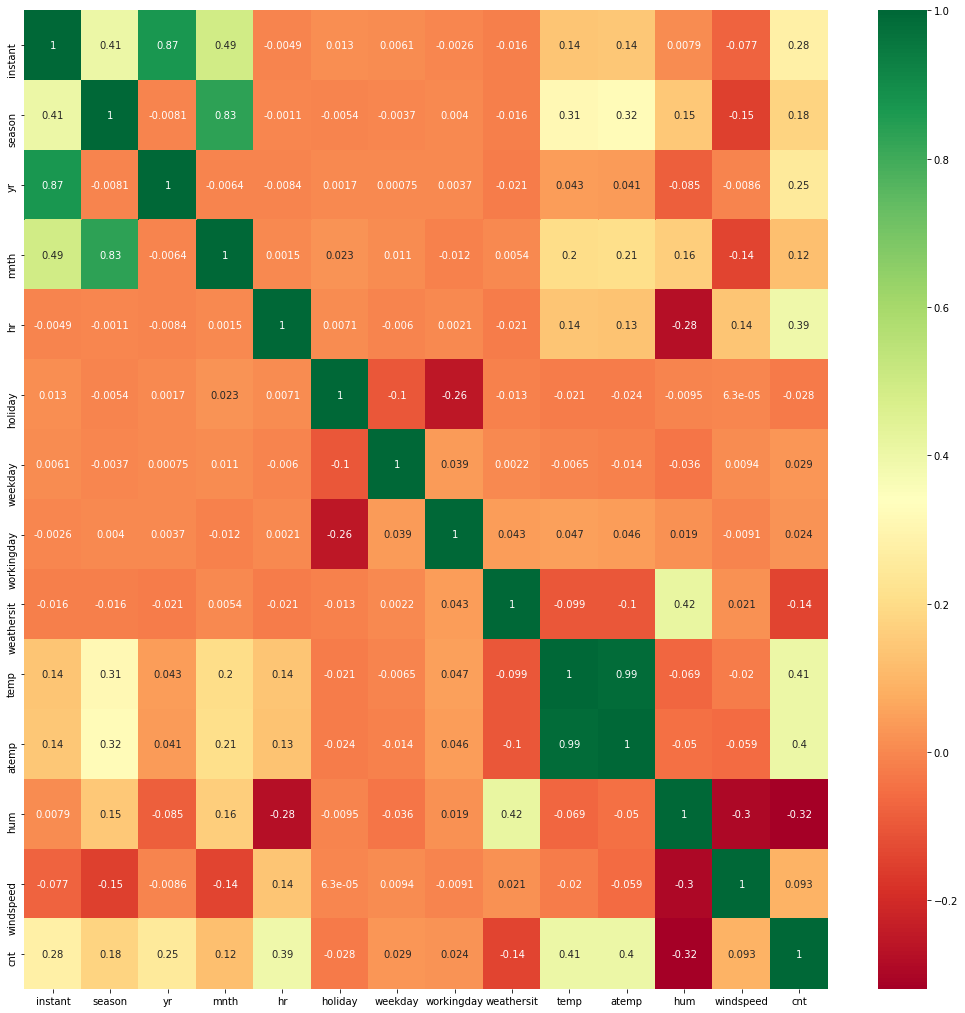

In [19]:
plt.figure(figsize=(18,18))
#ax= plt.subplot()
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlGn")
plt.show()
#ax.set_xlabel('Predicted labels');
#ax.set_ylabel('True labels'); 
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom+0.5, top-0.5)

In [20]:
X.head()

,instant,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,season_1,...,season_3,season_4,yr_0,yr_1,holiday_0,holiday_1,workday_0,workday_1,day,year
0,10136,3,9,6,3,0.38,0.3939,0.87,0.0896,1,...,0,0,0,1,1,0,1,0,3,2012
1,6987,10,17,0,1,0.50,0.4848,0.63,0.1343,0,...,0,1,1,0,1,0,1,0,23,2011
2,14303,8,3,5,1,0.64,0.6061,0.73,0.0000,0,...,1,0,0,1,1,0,0,1,24,2012
3,2295,4,11,0,2,0.40,0.4091,0.87,0.1343,0,...,0,0,1,0,1,0,1,0,4,2011
4,7869,11,12,2,3,0.42,0.4242,0.82,0.4179,0,...,0,1,1,0,1,0,0,1,29,2011


In [21]:
y.head()

0     94
1    340
2      8
3    202
4     18
Name: cnt, dtype: int64

In [22]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

In [23]:
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

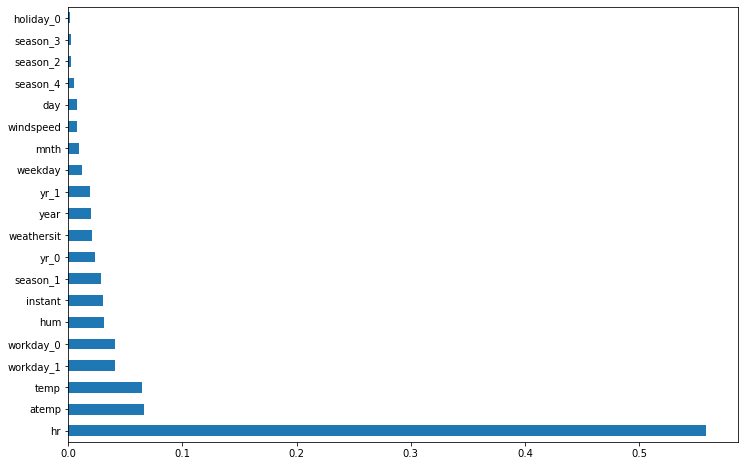

In [24]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(etr.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [32]:
feat_importances.sort_values()

holiday_1     0.001899
holiday_0     0.001923
season_3      0.002463
season_2      0.002753
season_4      0.005218
day           0.008004
windspeed     0.008134
mnth          0.009618
weekday       0.012167
yr_1          0.019260
year          0.020343
weathersit    0.021354
yr_0          0.023230
season_1      0.028829
instant       0.030775
hum           0.031595
workday_0     0.041423
workday_1     0.041425
temp          0.064714
atemp         0.066755
hr            0.558118
dtype: float64

In [35]:
X=X[['hr', 'atemp', 'temp', 'workday_0', 'workday_1', 'hum', 'instant', 'season_1', 
     'yr_0', 'weathersit', 'year', 'yr_1', 'weekday']]

In [36]:
X.head()

,hr,atemp,temp,workday_0,workday_1,hum,instant,season_1,yr_0,weathersit,year,yr_1,weekday
0,9,0.3939,0.38,1,0,0.87,10136,1,0,3,2012,1,6
1,17,0.4848,0.50,1,0,0.63,6987,0,1,1,2011,0,0
2,3,0.6061,0.64,0,1,0.73,14303,0,0,1,2012,1,5
3,11,0.4091,0.40,1,0,0.87,2295,0,1,2,2011,0,0
4,12,0.4242,0.42,0,1,0.82,7869,0,1,3,2011,0,2


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
y_pred = reg_rf.predict(X_test)

In [40]:
reg_rf.score(X_train, y_train)

0.9920859827211723

In [41]:
reg_rf.score(X_test, y_test)

0.9480435881734056

In [42]:
from sklearn import metrics

In [43]:
from sklearn.metrics import mean_squared_log_error

In [44]:
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_log_error(y_test, y_pred))) 

Root Mean Squared Error is:  0.3629721470189071


In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 24, num = 12)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [47]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [48]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [49]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=50, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=24 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=24, total=   0.7s
[CV] n_estimators=50, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=24 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=24, total=   0.7s
[CV] n_estimators=50, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=24 
[CV]  n_estimators=50, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=24, total=   0.7s
[CV] n_estimators=50, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=24 
[CV]  n_estimators=50, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=24, total=   0.7s
[CV] n_estimators=50, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=24 
[CV]  n_estimators=50, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=24, total=   0.7s
[CV] n_estimators=460, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=16 
[CV]  n_estimators=460, min_samples_split=2, min_samples_leaf=10, max_features=sqrt, max_depth=16, total=   6.1s
[CV] n_estimators=460, min_samples_split=2, min_sa

[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.4s
[CV] n_estimators=160, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.4s
[CV] n_estimators=160, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.4s
[CV] n_estimators=160, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.4s
[CV] n_estimators=160, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=8, total=   5.4s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                

In [50]:
rf_random.best_params_

{'n_estimators': 190,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 24}

In [51]:
prediction = rf_random.predict(X_test)

In [52]:
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_log_error(y_test, prediction))) 

Root Mean Squared Error is:  0.371903308686126


# Test data

In [53]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bike_data/bike_test.csv')

In [54]:
test_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,16267,15-11-2012,4,1,11,12,0,4,1,2,0.36,0.3636,0.62,0.1045
1,11800,11-05-2012,2,1,5,20,0,5,1,1,0.62,0.6061,0.25,0.1343
2,284,13-01-2011,1,0,1,6,0,4,1,1,0.12,0.1515,0.54,0.1343
3,8876,10-01-2012,1,1,1,16,0,2,1,1,0.42,0.4242,0.38,0.3582
4,8506,26-12-2011,1,0,12,2,1,1,0,1,0.34,0.3182,0.46,0.2239


In [55]:
test_data['weathersit'].value_counts()

1    2273
2     929
3     274
Name: weathersit, dtype: int64

In [56]:
Xt=test_data.copy()

In [58]:
seasont = pd.get_dummies(Xt, prefix=['season'], columns = ['season'])
yeart = pd.get_dummies(seasont, prefix=['yr'], columns = ['yr'])
wt = pd.get_dummies(yeart, prefix=['holiday'], columns = ['holiday'])
wdt = pd.get_dummies(wt, prefix=['workday'], columns = ['workingday'])
#wst = pd.get_dummies(wdt, prefix=['weathersit'], columns = ['weathersit'])

In [59]:
Xt=wdt.copy()

In [60]:
Xt.head()

,instant,dteday,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,holiday_0,holiday_1,workday_0,workday_1
0,16267,15-11-2012,11,12,4,2,0.36,0.3636,0.62,0.1045,0,0,0,1,0,1,1,0,0,1
1,11800,11-05-2012,5,20,5,1,0.62,0.6061,0.25,0.1343,0,1,0,0,0,1,1,0,0,1
2,284,13-01-2011,1,6,4,1,0.12,0.1515,0.54,0.1343,1,0,0,0,1,0,1,0,0,1
3,8876,10-01-2012,1,16,2,1,0.42,0.4242,0.38,0.3582,1,0,0,0,0,1,1,0,0,1
4,8506,26-12-2011,12,2,1,1,0.34,0.3182,0.46,0.2239,1,0,0,0,1,0,0,1,1,0


In [61]:
Xt['dteday'] =pd.to_datetime(Xt.dteday)

In [62]:
Xt.head()

,instant,dteday,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,holiday_0,holiday_1,workday_0,workday_1
0,16267,2012-11-15,11,12,4,2,0.36,0.3636,0.62,0.1045,0,0,0,1,0,1,1,0,0,1
1,11800,2012-11-05,5,20,5,1,0.62,0.6061,0.25,0.1343,0,1,0,0,0,1,1,0,0,1
2,284,2011-01-13,1,6,4,1,0.12,0.1515,0.54,0.1343,1,0,0,0,1,0,1,0,0,1
3,8876,2012-10-01,1,16,2,1,0.42,0.4242,0.38,0.3582,1,0,0,0,0,1,1,0,0,1
4,8506,2011-12-26,12,2,1,1,0.34,0.3182,0.46,0.2239,1,0,0,0,1,0,0,1,1,0


In [63]:
Xt["day"] = pd.to_datetime(Xt.dteday, format="%d/%m/%Y").dt.day
Xt["year"] = pd.to_datetime(Xt.dteday, format = "%d/%m/%Y").dt.year

In [64]:
Xt=Xt.drop('dteday', axis=1)

In [65]:
Xt.head()

,instant,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,season_1,...,season_3,season_4,yr_0,yr_1,holiday_0,holiday_1,workday_0,workday_1,day,year
0,16267,11,12,4,2,0.36,0.3636,0.62,0.1045,0,...,0,1,0,1,1,0,0,1,15,2012
1,11800,5,20,5,1,0.62,0.6061,0.25,0.1343,0,...,0,0,0,1,1,0,0,1,5,2012
2,284,1,6,4,1,0.12,0.1515,0.54,0.1343,1,...,0,0,1,0,1,0,0,1,13,2011
3,8876,1,16,2,1,0.42,0.4242,0.38,0.3582,1,...,0,0,0,1,1,0,0,1,1,2012
4,8506,12,2,1,1,0.34,0.3182,0.46,0.2239,1,...,0,0,1,0,0,1,1,0,26,2011


In [66]:
Xt.columns

Index(['instant', 'mnth', 'hr', 'weekday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'season_1', 'season_2', 'season_3', 'season_4',
       'yr_0', 'yr_1', 'holiday_0', 'holiday_1', 'workday_0', 'workday_1',
       'day', 'year'],
      dtype='object')

In [67]:
Xt=Xt[['hr', 'atemp', 'temp', 'workday_0', 'workday_1', 'hum', 'instant', 'season_1', 
     'yr_0', 'weathersit', 'year', 'yr_1', 'weekday']]

In [68]:
target = rf_random.predict(Xt)

In [69]:
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("submission.csv")  